# EDA

In [10]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<AxesSubplot: xlabel='Age'>

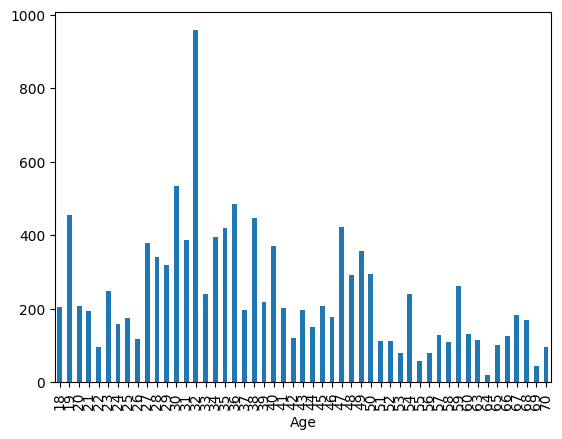

In [9]:
data.groupby('Age')['Annual Income (k$)'].sum().plot(kind='bar', legend=None)

<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

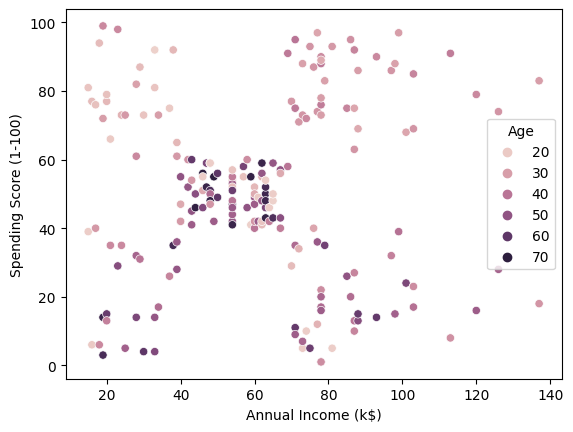

In [13]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, hue="Age")

# K-Means Clustering

c:\Users\1vict\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\1vict\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\1vict\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\1vict\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

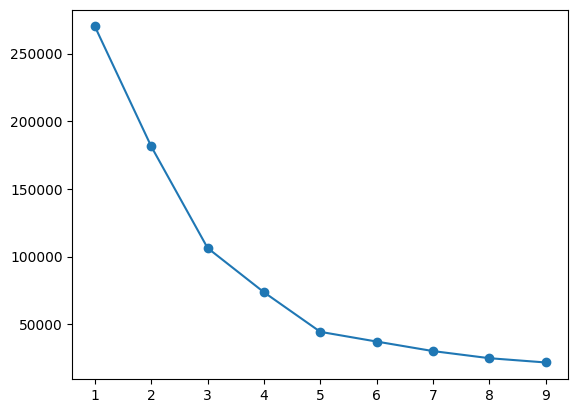

In [54]:
from sklearn.cluster import KMeans
train = data[['Annual Income (k$)', 'Spending Score (1-100)']]

ks = range(1, 10)
wcss = []

for k in ks:
    model = KMeans(n_clusters=k)
    model = model.fit(train)
    wcss.append(model.inertia_)
    
plt.plot(ks, wcss, '-o')


c:\Users\1vict\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<AxesSubplot: >

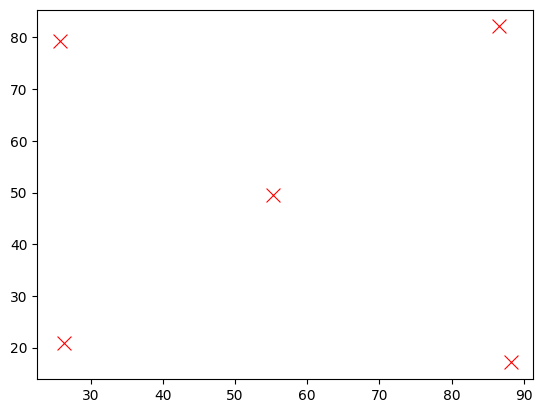

In [55]:
model_final = KMeans(n_clusters=5)
model_final = model_final.fit(train)
#dibujame los puntos de las k
sns.scatterplot(x=model_final.cluster_centers_[:,0], y=model_final.cluster_centers_[:,1], color='red', s=100, marker='x')

In [47]:

res = model_final.predict(train)
dataPredict = pd.DataFrame(res, columns=['cluster'])
dataPredict = pd.concat([train, dataPredict], axis=1)
dataPredict = dataPredict.groupby('cluster').mean()
dataPredict

,Annual Income (k$),Spending Score (1-100)
cluster,,
0,55.296296,49.518519
1,88.200000,17.114286
2,26.304348,20.913043
3,86.538462,82.128205
4,25.727273,79.363636
